In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def get_final_data(data, aps):
    final_data = {}
    for n in data:
        total_ap_rat = []
        total_shots = np.unique(np.concatenate(data[n]['shots']))
        for i in range(len(data[n]['shots'])):
            samples = []
            energies = []
            ap_ratios = []
            j = 0
            b = data[n]['shots'][i]
            c = data[n]['samples'][i]
            e = data[n]['energies'][i]
            a = data[n]['ap_ratio'][i]
            #print(b, c, e)
            for s in total_shots:
                while j < (len(b)) and b[j] <= s:
                    j += 1
                samples.append(c[j - 1])
                energies.append(e[j - 1])
                ap_ratios.append(a[j - 1])
            total_ap_rat.append(ap_ratios)
        total_ap_rat = np.array(total_ap_rat)
        final_data[n] = {'aps': {}, 'shots': total_shots}
        for a in aps:
            final_data[n]['aps'][a] = []
            for s in range(len(total_shots)):
                final_data[n]['aps'][a].append(len(np.where(total_ap_rat[:, s] > a)[0]) / len(total_ap_rat))
    return final_data

# Data

## MaxCut

In [4]:
folder_maxcut = '../simulations/maxcut/'
# FVQE
with open(folder_maxcut + 'data_maxcut_fvqe.pkl', 'rb') as handle:
    data_maxcut_fvqe = pickle.load(handle)
# Classical
with open(folder_maxcut + 'data_maxcut_classical.pkl', 'rb') as handle:
    data_maxcut_cl = pickle.load(handle)
# Sequential
with open(folder_maxcut + 'data_maxcut_sequential.pkl', 'rb') as handle:
    data_maxcut_seq = pickle.load(handle)
# Annealing
with open(folder_maxcut + 'data_maxcut_annealing.pkl', 'rb') as handle:
    data_maxcut_an = pickle.load(handle)
    

aps = [0.9, 0.95, 0.99, 1]
final_data_maxcut_fvqe = get_final_data(data_maxcut_fvqe, aps)
final_data_maxcut_cl = get_final_data(data_maxcut_cl, aps)
final_data_maxcut_seq = get_final_data(data_maxcut_seq, aps)
final_data_maxcut_an = get_final_data(data_maxcut_an, aps)

for a in aps:
    for i in range(1, len(final_data_maxcut_fvqe[27]['aps'][a])):
        final_data_maxcut_fvqe[27]['aps'][a][i] = max(final_data_maxcut_fvqe[27]['aps'][a][i], 
                                                    final_data_maxcut_fvqe[27]['aps'][a][i-1])
    

## ATSP

In [6]:
folder_atsp = '../simulations/atsp/'

# FVQE
with open(folder_atsp + 'data_atsp_fvqe.pkl', 'rb') as handle:
    data_atsp_fvqe = pickle.load(handle)
# Classical
with open(folder_atsp + 'data_atsp_classical.pkl', 'rb') as handle:
    data_atsp_cl = pickle.load(handle)
# Sequential
with open(folder_atsp + 'data_atsp_sequential.pkl', 'rb') as handle:
    data_atsp_seq = pickle.load(handle)
# Annealing
with open(folder_atsp + 'data_atsp_annealing.pkl', 'rb') as handle:
    data_atsp_an = pickle.load(handle)
    
aps = [0.9, 0.95, 0.99, 1]
final_data_atsp_fvqe = get_final_data(data_atsp_fvqe, aps)
final_data_atsp_cl = get_final_data(data_atsp_cl, aps)
final_data_atsp_seq = get_final_data(data_atsp_seq, aps)
final_data_atsp_an = get_final_data(data_atsp_an, aps)

del final_data_atsp_fvqe[5]
for a in aps:
    for i in range(1, len(final_data_atsp_fvqe[26]['aps'][a])):
        final_data_atsp_fvqe[26]['aps'][a][i] = max(final_data_atsp_fvqe[26]['aps'][a][i], 
                                                    final_data_atsp_fvqe[26]['aps'][a][i-1])
qubit_to_cities = {int(np.ceil(np.log2(math.factorial(n-1)))): n for n in range(4, 17)}

In [7]:
pcts = [0.9, 0.60, 0.30]
pcts = sorted(pcts)

final_data_maxcut = {}
final_data_maxcut_c = {}
for a in aps:
    for p in pcts:
        for f in [final_data_maxcut, final_data_maxcut_c]:
            f[(a, p)] = {}
    #         final_data_maxcut[(a, p)]['fvqe'] = [final_data_maxcut_fvqe[n]['shots'][np.where(np.array(final_data_maxcut_fvqe[n]['aps'][a]) >= p)[0][0]] for n in sorted(final_data_maxcut_fvqe.keys())]
            f[(a, p)]['fvqe'] = []
            f[(a, p)]['cl'] = []
            f[(a, p)]['seq'] = []
            f[(a, p)]['an'] = []

        for n in sorted(final_data_maxcut_fvqe.keys()):
            c = np.power(2, n)
            if n < 13:
                continue
            ind = np.where(np.array(final_data_maxcut_fvqe[n]['aps'][a]) >= p)[0]
            if len(ind) > 0:
                final_data_maxcut[(a, p)]['fvqe'].append(final_data_maxcut_fvqe[n]['shots'][ind[0]])
                final_data_maxcut_c[(a, p)]['fvqe'].append(final_data_maxcut_fvqe[n]['shots'][ind[0]]/c)
            else:
                final_data_maxcut[(a, p)]['fvqe'].append(None)
                final_data_maxcut_c[(a, p)]['fvqe'].append(None)
                
            ind = np.where(np.array(final_data_maxcut_cl[n]['aps'][a]) >= p)[0]
            if len(ind) > 0:
                final_data_maxcut[(a, p)]['cl'].append(final_data_maxcut_cl[n]['shots'][ind[0]])
                final_data_maxcut_c[(a, p)]['cl'].append(final_data_maxcut_cl[n]['shots'][ind[0]]/c)
            else:
                final_data_maxcut[(a, p)]['cl'].append(None)
                final_data_maxcut_c[(a, p)]['cl'].append(None)
            
            ind = np.where(np.array(final_data_maxcut_seq[n]['aps'][a]) >= p)[0]
            if len(ind) > 0:
                final_data_maxcut[(a, p)]['seq'].append(final_data_maxcut_seq[n]['shots'][ind[0]])
                final_data_maxcut_c[(a, p)]['seq'].append(final_data_maxcut_seq[n]['shots'][ind[0]]/c)
            else:
                final_data_maxcut[(a, p)]['seq'].append(None)
                final_data_maxcut_c[(a, p)]['seq'].append(None)
            
            ind = np.where(np.array(final_data_maxcut_an[n]['aps'][a]) >= p)[0]
            if len(ind) > 0:
                final_data_maxcut[(a, p)]['an'].append(final_data_maxcut_an[n]['shots'][ind[0]])
                final_data_maxcut_c[(a, p)]['an'].append(final_data_maxcut_an[n]['shots'][ind[0]]/c)
            else:
                final_data_maxcut[(a, p)]['an'].append(None)
                final_data_maxcut_c[(a, p)]['an'].append(None)
final_data_atsp = {}
final_data_atsp_c1 = {}
final_data_atsp_c2 = {}

for a in aps:
    for p in pcts:
        for f in [final_data_atsp, final_data_atsp_c1, final_data_atsp_c2]:
            f[(a, p)] = {}
            f[(a, p)]['fvqe'] = []
            f[(a, p)]['cl'] = []
            f[(a, p)]['seq'] = []
            f[(a, p)]['an'] = []

        for n in sorted(final_data_atsp_fvqe.keys()):
            c1 = np.power(2, n)
            c2 = math.factorial(qubit_to_cities[n] - 1)
            if n == 5:
                continue
            ind = np.where(np.array(final_data_atsp_fvqe[n]['aps'][a]) >= p)[0]
            if len(ind) > 0:
                final_data_atsp[(a, p)]['fvqe'].append(final_data_atsp_fvqe[n]['shots'][ind[0]])
                final_data_atsp_c1[(a, p)]['fvqe'].append(final_data_atsp_fvqe[n]['shots'][ind[0]]/c1)
                final_data_atsp_c2[(a, p)]['fvqe'].append(final_data_atsp_fvqe[n]['shots'][ind[0]]/c2)
            else:
                final_data_atsp[(a, p)]['fvqe'].append(None)
                final_data_atsp_c1[(a, p)]['fvqe'].append(None)
                final_data_atsp_c2[(a, p)]['fvqe'].append(None)
            
            ind = np.where(np.array(final_data_atsp_cl[n]['aps'][a]) >= p)[0]
            if len(ind) > 0:
                final_data_atsp[(a, p)]['cl'].append(final_data_atsp_cl[n]['shots'][ind[0]])
                final_data_atsp_c1[(a, p)]['cl'].append(final_data_atsp_cl[n]['shots'][ind[0]]/c1)
                final_data_atsp_c2[(a, p)]['cl'].append(final_data_atsp_cl[n]['shots'][ind[0]]/c2)
            else:
                final_data_atsp[(a, p)]['cl'].append(None)
                final_data_atsp_c1[(a, p)]['cl'].append(None)
                final_data_atsp_c2[(a, p)]['cl'].append(None)
            
            ind = np.where(np.array(final_data_atsp_seq[n]['aps'][a]) >= p)[0]
            if len(ind) > 0:
                final_data_atsp[(a, p)]['seq'].append(final_data_atsp_seq[n]['shots'][ind[0]])
                final_data_atsp_c1[(a, p)]['seq'].append(final_data_atsp_seq[n]['shots'][ind[0]]/c1)
                final_data_atsp_c2[(a, p)]['seq'].append(final_data_atsp_seq[n]['shots'][ind[0]]/c2)
            else:
                final_data_atsp[(a, p)]['seq'].append(None)
                final_data_atsp_c1[(a, p)]['seq'].append(None)
                final_data_atsp_c2[(a, p)]['seq'].append(None)
            
            ind = np.where(np.array(final_data_atsp_an[n]['aps'][a]) >= p)[0]
            if len(ind) > 0:
                final_data_atsp[(a, p)]['an'].append(final_data_atsp_an[n]['shots'][ind[0]])
                final_data_atsp_c1[(a, p)]['an'].append(final_data_atsp_an[n]['shots'][ind[0]]/c1)
                final_data_atsp_c2[(a, p)]['an'].append(final_data_atsp_an[n]['shots'][ind[0]]/c2)
            else:
                final_data_atsp[(a, p)]['an'].append(None)
                final_data_atsp_c1[(a, p)]['an'].append(None)
                final_data_atsp_c2[(a, p)]['an'].append(None)


# Plots

In [8]:
colors = {
    'cl': '#C9ACE8',
    'seq': '#9ED0E2',
    'an': '#0571B0',
    'fvqe': '#8762B3',

    
}
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIX"
mpl.rcParams["mathtext.fontset"] = "stix"

## MaxCut

In [9]:
n_qubits_maxcut = [13, 21, 29]

for n_qubits in n_qubits_maxcut:
    max_shot = max(final_data_maxcut_fvqe[n_qubits]['shots'][-1], final_data_maxcut_cl[n_qubits]['shots'][-1], 
                   final_data_maxcut_an[n_qubits]['shots'][-1], final_data_maxcut_seq[n_qubits]['shots'][-1])
    for data in [final_data_maxcut_fvqe, final_data_maxcut_cl, final_data_maxcut_an, final_data_maxcut_seq]:
        if max_shot != data[n_qubits]['shots'][-1]:
            data[n_qubits]['shots'] = np.concatenate((data[n_qubits]['shots'], [max_shot]))
            for ap in data[n_qubits]['aps']:
                if ap != 'shots':
                    data[n_qubits]['aps'][ap] = np.concatenate((data[n_qubits]['aps'][ap], [data[n_qubits]['aps'][ap][-1]]))

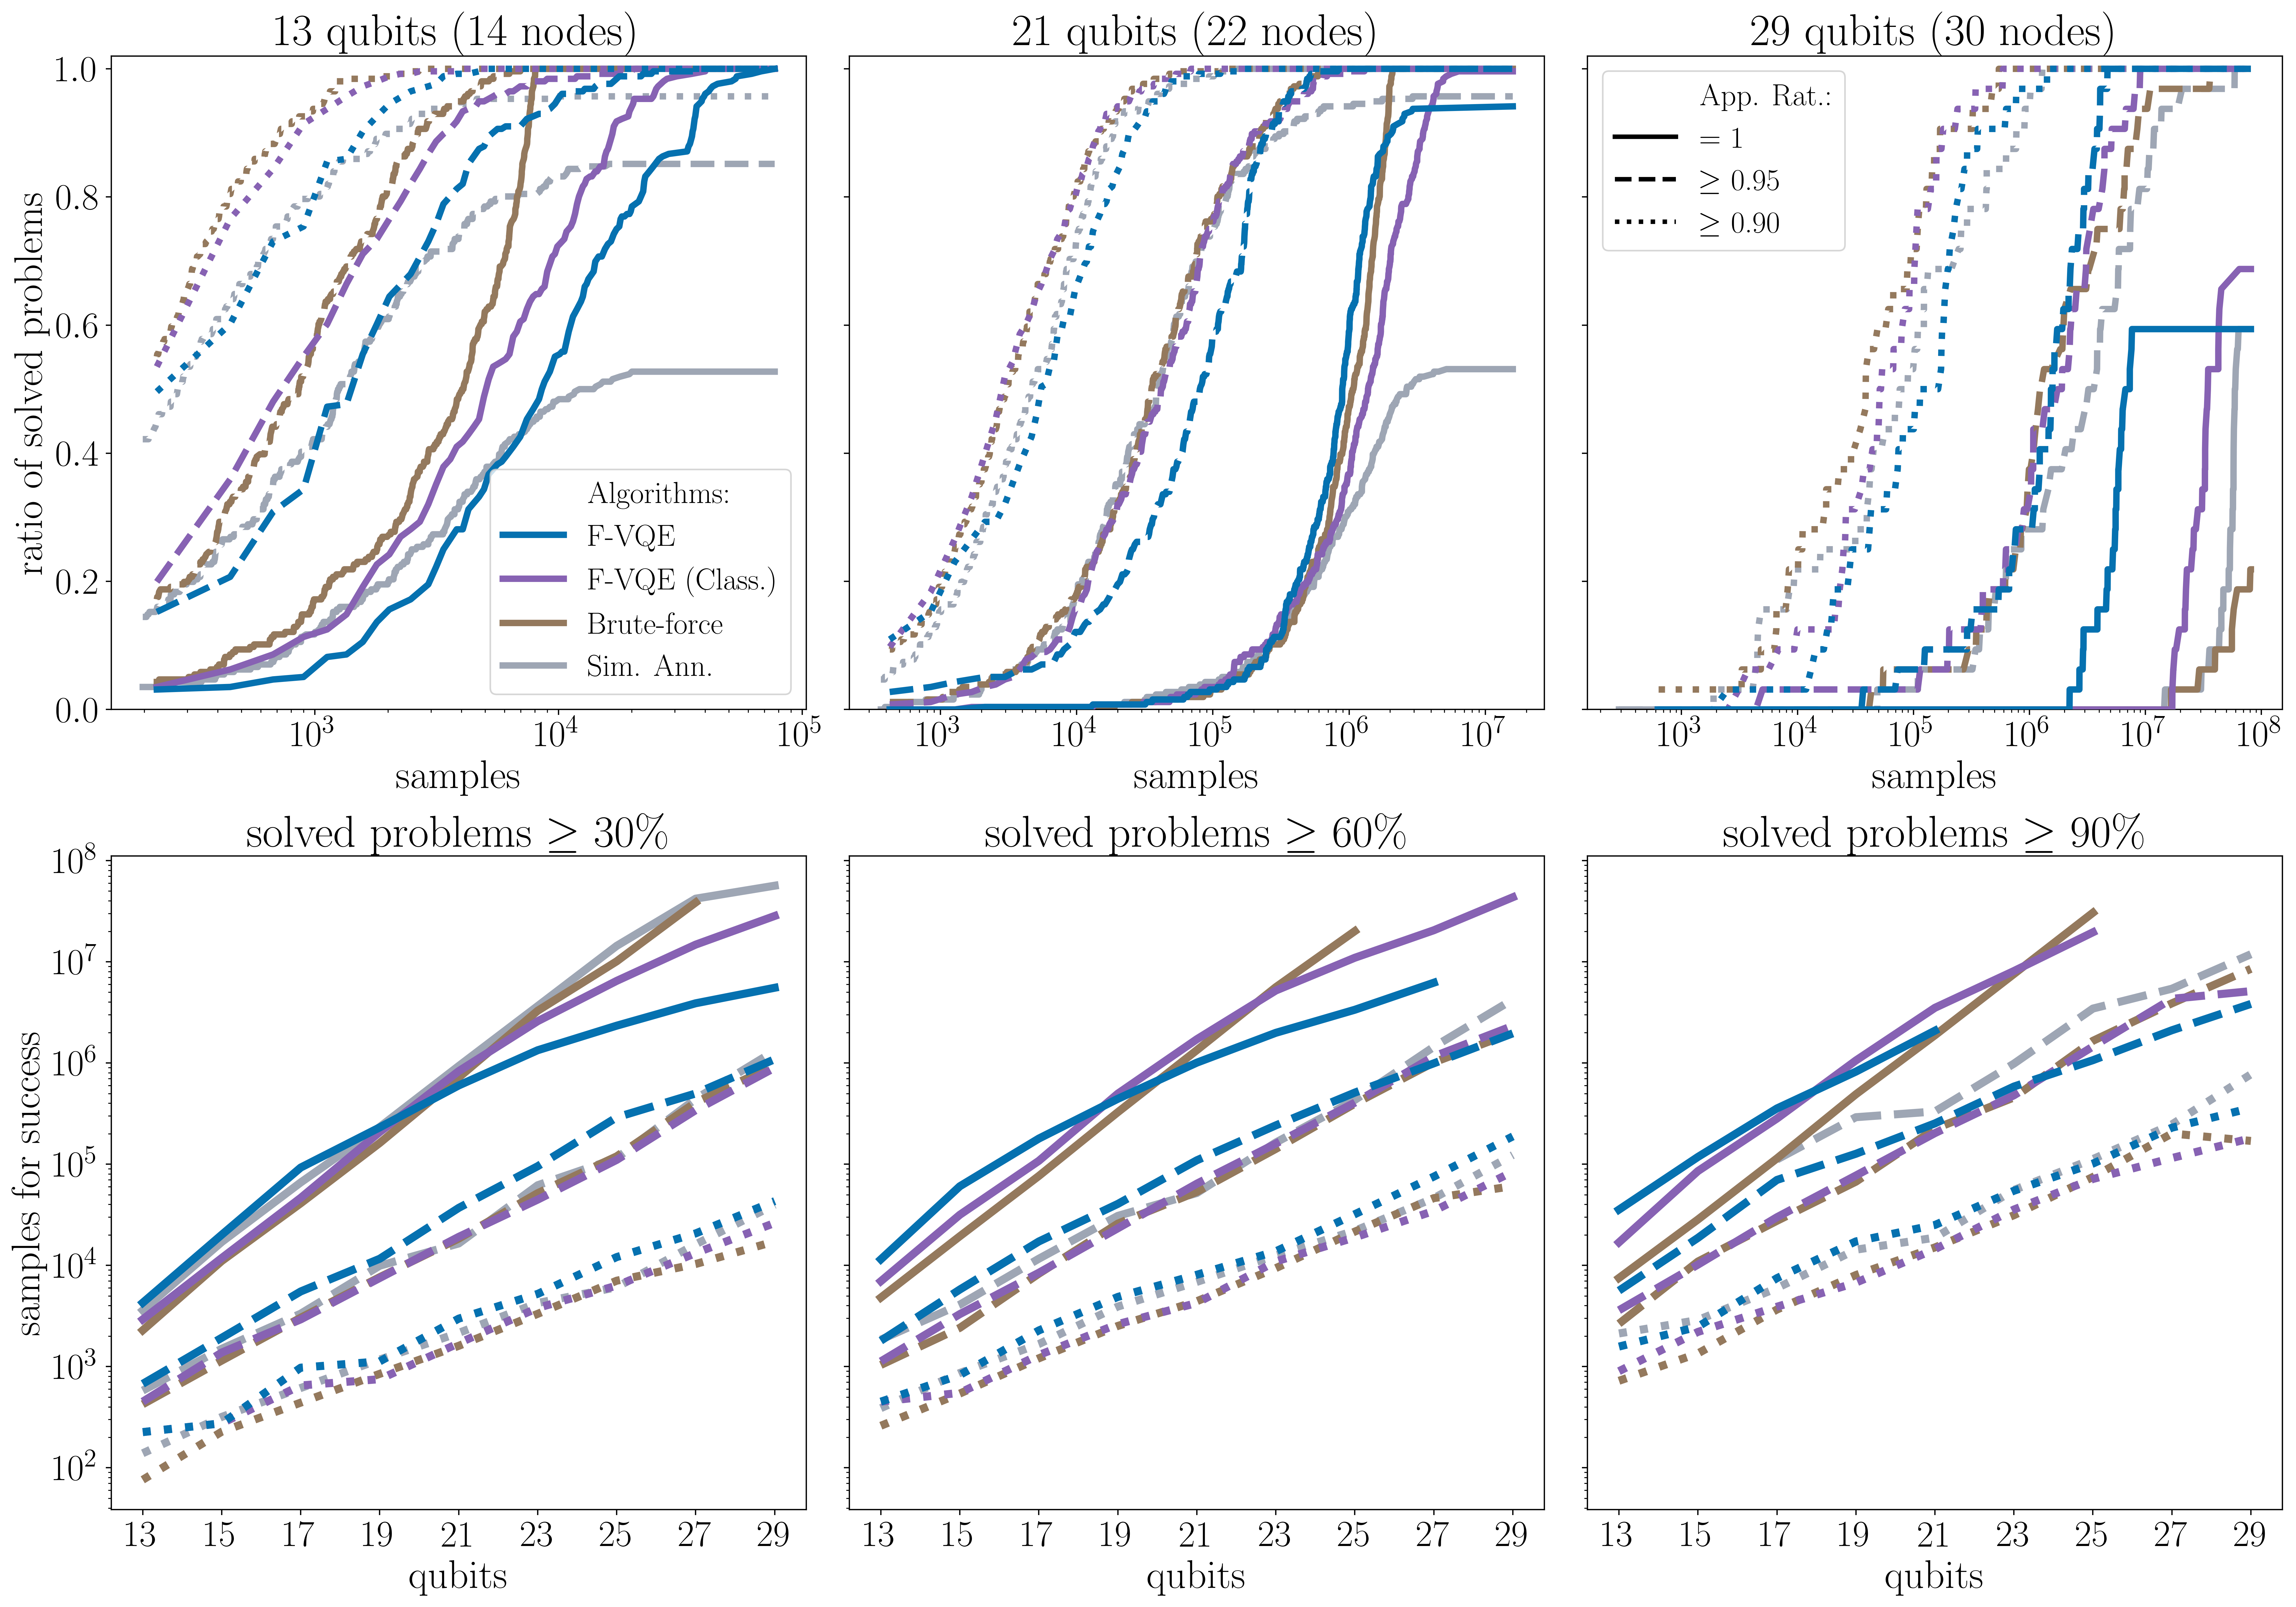

In [10]:
ns_maxcut = [13, 15, 17, 19, 21, 23, 25, 27, 29]
n_qubits_maxcut = [13, 21, 29]
n_qubits_atsp = [13, 22, 29]

fig, axs = plt.subplots(2,3, dpi=400, sharey='row', figsize=(20, 14))

colors = {
    0.9: '#313695',
    0.95: '#74add1',
    0.99: '#fee090',
    1: '#f46d43'
}
colors = {
    'clas': '#8762B3',
    'seq': '#94795D',
    'sim': '#9EA6B4',
    'fvqe': '#0571B0',
}
linewidth = 4

linestyles = {
    1: '-',
#     0.99: '-.',
    0.95: '--',
    0.9: ':',
}
i, j = 0, 0
for n in range(len(n_qubits_maxcut)):

    n_qubits = n_qubits_maxcut[n]
    first_shot = final_data_maxcut_fvqe[n_qubits]['shots'][0]
    first_shot_an = np.where(final_data_maxcut_seq[n_qubits]['shots']>=first_shot)[0][0]
    
    for ap in linestyles:
        axs[0,j].plot(final_data_maxcut_fvqe[n_qubits]['shots'], final_data_maxcut_fvqe[n_qubits]['aps'][ap], c=colors['fvqe'], 
                 linewidth=linewidth, linestyle=linestyles[ap], zorder=4)
        axs[0,j].plot(final_data_maxcut_cl[n_qubits]['shots'], final_data_maxcut_cl[n_qubits]['aps'][ap],c=colors['clas'], 
                 linewidth=linewidth, linestyle=linestyles[ap], zorder=3)
        axs[0,j].plot(final_data_maxcut_seq[n_qubits]['shots'][first_shot_an:], 
                 final_data_maxcut_seq[n_qubits]['aps'][ap][first_shot_an:], c=colors['seq'], linewidth=linewidth, 
                       linestyle=linestyles[ap], zorder=2)
        axs[0,j].plot(final_data_maxcut_an[n_qubits]['shots'][first_shot_an:], 
                 final_data_maxcut_an[n_qubits]['aps'][ap][first_shot_an:], c=colors['sim'], 
                       linewidth=linewidth, linestyle=linestyles[ap], zorder=1)
    axs[0,j].set_xscale('log')
#     axs[i, j].set_title(f'MAXCUT | {n_qubits} qubits ({n_qubits + 1} nodes)', fontsize=10)
    axs[0,j].set_title(f'{n_qubits} qubits ({n_qubits + 1} nodes)', fontsize=28)

#     axs[i, j].legend(prop={"size":8})
    axs[0,j].tick_params(labelsize=23)
    axs[0,j].set_ylim(0,1.02)
    j = (j + 1) % 3
#     if j == 0:
#         i += 1
axs[0,0].plot([], [], ' ', c='black', label="Algorithms:")
axs[0,0].plot([], [], '-', c=colors['fvqe'], label="F-VQE", linewidth=linewidth)
axs[0,0].plot([], [], '-', c=colors['clas'], label="F-VQE (Class.)", linewidth=linewidth)
axs[0,0].plot([], [], '-', c=colors['seq'], label="Brute-force", linewidth=linewidth)
axs[0,0].plot([], [], '-', c=colors['sim'], label="Sim. Ann.", linewidth=linewidth)
axs[0,2].plot([], [], ' ', c='black', label="App. Rat.:")
axs[0,2].plot([], [], linestyles[1], c='black', label="= 1", linewidth=linewidth-1.2)
#     axs[j].plot([], [], linestyles[0.99], c='black', label=r"$\geq$ 0.99", linewidth=linewidth-1.2)
axs[0,2].plot([], [], linestyles[0.95], c='black', label=r"$\geq$ 0.95", linewidth=linewidth-1.2)
axs[0,2].plot([], [], linestyles[0.9], c='black', label=r"$\geq$ 0.90", linewidth=linewidth-1.2)
axs[0,2].legend(prop={"size":19})
axs[0,0].legend(prop={"size":19})    
# fig.suptitle(r'Maxcut', fontsize=20) 
axs[0,0].set_ylabel('ratio of solved problems', fontsize=25)
axs[0,0].set_ylabel('ratio of solved problems', fontsize=25)
axs[0,0].set_ylabel('ratio of solved problems', fontsize=25)

axs[0,0].set_xlabel(r'samples', fontsize=25)
axs[0,1].set_xlabel(r'samples', fontsize=25)
axs[0,2].set_xlabel(r'samples', fontsize=25)


linewidth = 5
markersize = 7
for i in range(len(pcts)):    
    a0, = axs[1, i].plot([], [], ' ', c='black', label="Algorithms:")
    a1, = axs[1, i].plot([], [], '-', c=colors['fvqe'], label="F-VQE", linewidth=linewidth)
    a2, = axs[1, i].plot([], [], '-', c=colors['clas'], label="F-VQE (Class.)", linewidth=linewidth)
    a3, = axs[1, i].plot([], [], '-', c=colors['seq'], label="Brute-force", linewidth=linewidth)
    a4, = axs[1, i].plot([], [], '-', c=colors['sim'], label="Sim. Ann.", linewidth=linewidth)
    f0, = axs[1, i].plot([], [], ' ', c='black', label="App. Rat.:")
    f1, = axs[1, i].plot([], [], linestyles[1], c='black', label="= 1", linewidth=linewidth-1.2)
    f2, = axs[1, i].plot([], [], linestyles[0.95], c='black', label=r"$\geq$ 0.95", linewidth=linewidth-1.2)
    f3, = axs[1, i].plot([], [], linestyles[0.9], c='black', label=r"$\geq$ 0.9", linewidth=linewidth-1.2)
    for j in range(len(aps)):
        a = aps[j]
        p = pcts[i]
        
        if a == 0.99:
            continue
        axs[1, i].plot(ns_maxcut, [y for i,y in enumerate(final_data_maxcut[(a, p)]['an'])], linestyle=linestyles[a], color=colors['sim'], 
                       linewidth=linewidth, markersize=markersize, zorder=1)
        axs[1, i].plot(ns_maxcut, [y for i,y in enumerate(final_data_maxcut[(a, p)]['seq'])], linestyle=linestyles[a], color=colors['seq'], 
                      linewidth=linewidth, markersize=markersize, zorder=2)
        axs[1, i].plot(ns_maxcut, [y for i,y in enumerate(final_data_maxcut[(a, p)]['cl'])], linestyle=linestyles[a], color=colors['clas'], 
                      linewidth=linewidth, markersize=markersize, zorder=3)
        axs[1, i].plot(ns_maxcut, [y for i,y in enumerate(final_data_maxcut[(a, p)]['fvqe'])], linestyle=linestyles[a], color=colors['fvqe'], 
                      linewidth=linewidth, markersize=markersize, zorder=4)
#     if i == 0: 
#         first_legend = axs[i].legend(handles=[a0,a1,a2,a3,a4], loc='upper left', fontsize=15)
#         axs[i].add_artist(first_legend)
#         axs[i].legend(handles=[f0,f1,f2,f3], loc='lower right', fontsize=15)

    else:
        pass
#         axs[i].legend(fontsize=14)
    axs[1,i].set_title(r'solved problems $\geq$ '+f'{int(p*100)}\%', fontsize=28)
    axs[1,i].set_yscale('log')
    axs[1,i].set_xticks(ns_maxcut)
    axs[1,i].set_xlabel(r'qubits', fontsize=25)
    axs[1,i].tick_params(labelsize=23)
# axs[1,0].legend(handles=[a0,a1,a2,a3,a4], loc='upper left', fontsize=19)
# axs[1,1].legend(handles=[f0,f1,f2,f3], loc='upper left', fontsize=19)
axs[1,0].set_ylabel(r'samples for success', fontsize=25)
# axs[i].set_title(r'App. rat. $=$ '+f'{a}', fontsize=23)

fig.tight_layout()
# plt.savefig('final_analysis_maxcut.pdf', bbox_inches='tight', format='pdf')
# plt.savefig('final_analysis_maxcut.png', bbox_inches='tight', format='png')



## ATSP

In [11]:
n_qubits_atsp = [13, 22, 29]

for n_qubits in n_qubits_atsp:
    max_shot = max(final_data_atsp_fvqe[n_qubits]['shots'][-1], final_data_atsp_cl[n_qubits]['shots'][-1], 
                   final_data_atsp_an[n_qubits]['shots'][-1], final_data_atsp_seq[n_qubits]['shots'][-1])
    for data in [final_data_atsp_fvqe, final_data_atsp_cl, final_data_atsp_an, final_data_atsp_seq]:
        if max_shot != data[n_qubits]['shots'][-1]:
            data[n_qubits]['shots'] = np.concatenate((data[n_qubits]['shots'], [max_shot]))
            for ap in data[n_qubits]['aps']:
                if ap != 'shots':
                    data[n_qubits]['aps'][ap] = np.concatenate((data[n_qubits]['aps'][ap], [data[n_qubits]['aps'][ap][-1]]))

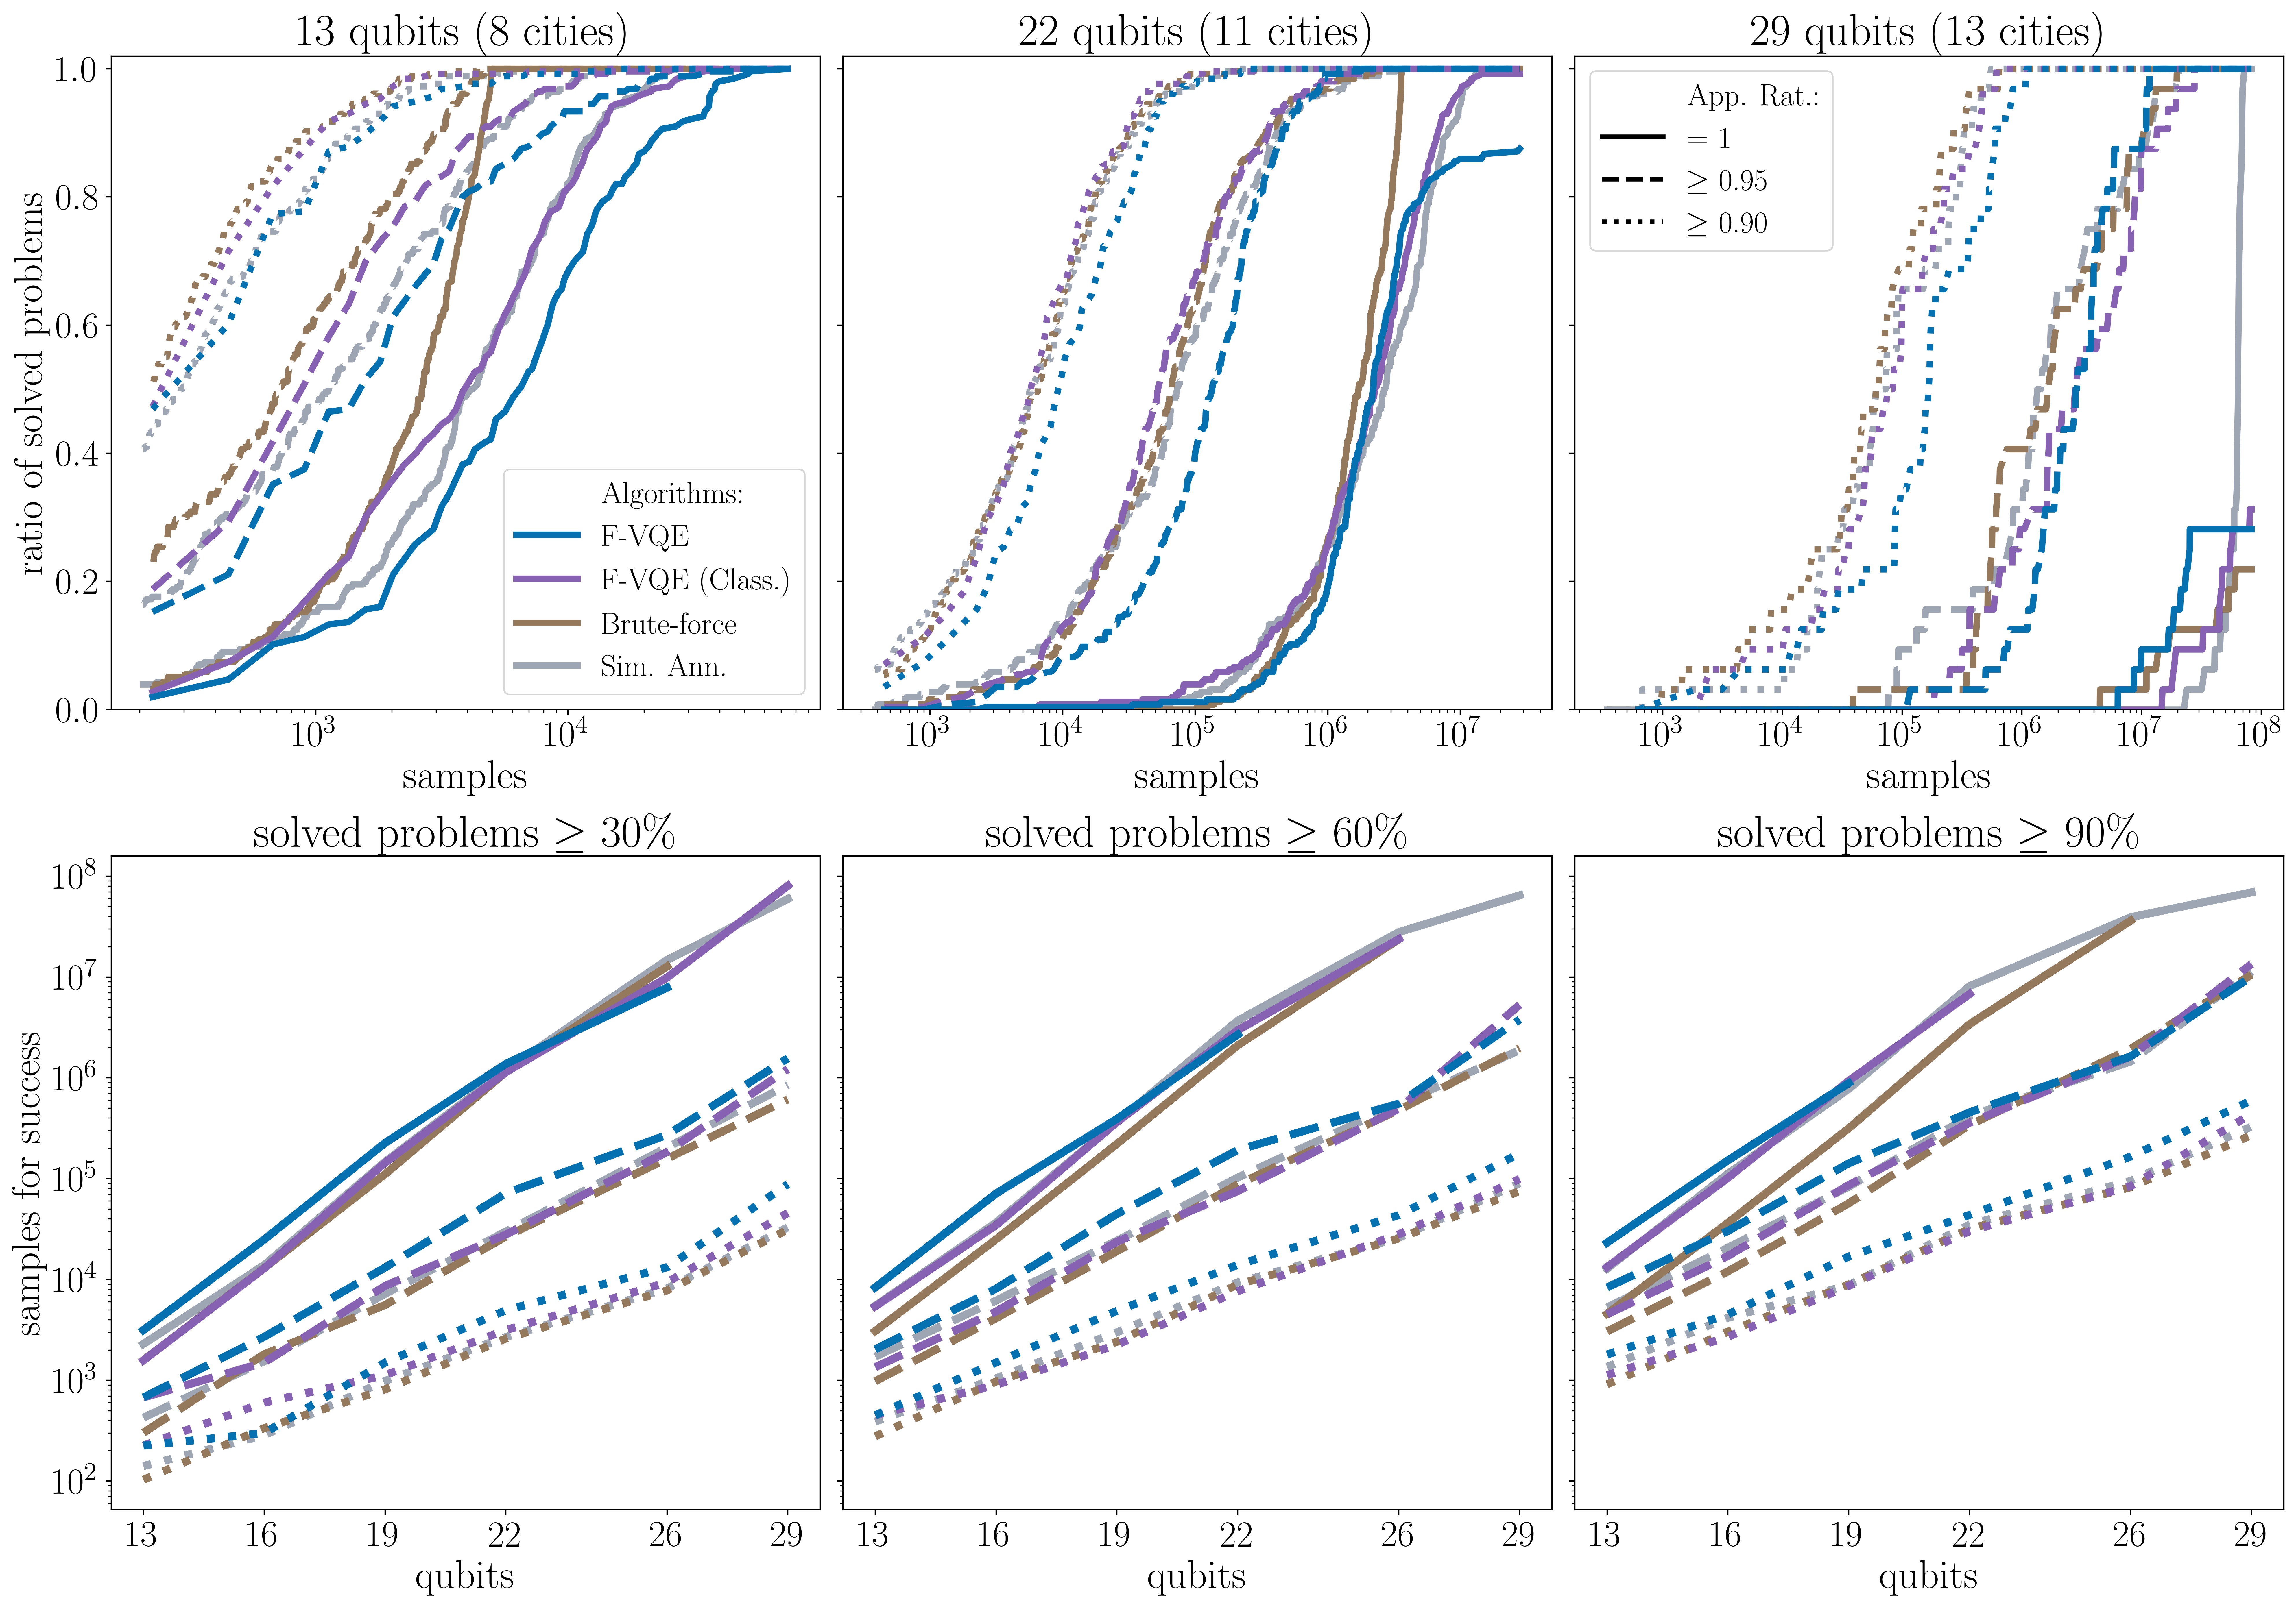

In [12]:
n_qubits_atsp = [13, 22, 29]

fig, axs = plt.subplots(2,3, dpi=400, sharey='row', figsize=(20, 14))

colors = {
    0.9: '#313695',
    0.95: '#74add1',
    0.99: '#fee090',
    1: '#f46d43'
}
colors = {
    'clas': '#8762B3',
    'seq': '#94795D',
    'sim': '#9EA6B4',
    'fvqe': '#0571B0',
}
linewidth = 4

linestyles = {
    1: '-',
#     0.99: '-.',
    0.95: '--',
    0.9: ':',
}
i, j = 0, 0
for n in range(len(n_qubits_atsp)):
#     axs[0,j].plot([], [], ' ', c='black', label="Algorithms:")
#     axs[0,j].plot([], [], '-', c=colors['fvqe'], label="F-VQE", linewidth=linewidth)
#     axs[0,j].plot([], [], '-', c=colors['clas'], label="Classical", linewidth=linewidth)
#     axs[0,j].plot([], [], '-', c=colors['seq'], label="Brute-force", linewidth=linewidth)
#     axs[0,j].plot([], [], '-', c=colors['sim'], label="Annealing", linewidth=linewidth)
#     axs[0,j].plot([], [], ' ', c='black', label="App. Rat.:")
#     axs[0,j].plot([], [], linestyles[1], c='black', label="= 1", linewidth=linewidth-1.2)
# #     axs[j].plot([], [], linestyles[0.99], c='black', label=r"$\geq$ 0.99", linewidth=linewidth-1.2)
#     axs[0,j].plot([], [], linestyles[0.95], c='black', label=r"$\geq$ 0.95", linewidth=linewidth-1.2)
#     axs[0,j].plot([], [], linestyles[0.9], c='black', label=r"$\geq$ 0.90", linewidth=linewidth-1.2)

    n_qubits = n_qubits_atsp[n]
    first_shot = final_data_atsp_fvqe[n_qubits]['shots'][0]
    first_shot_an = np.where(final_data_atsp_seq[n_qubits]['shots']>=first_shot)[0][0]
    
    for ap in linestyles:
        axs[0,j].plot(final_data_atsp_fvqe[n_qubits]['shots'], final_data_atsp_fvqe[n_qubits]['aps'][ap], c=colors['fvqe'], 
                 linewidth=linewidth, linestyle=linestyles[ap], zorder=4)
        axs[0,j].plot(final_data_atsp_cl[n_qubits]['shots'], final_data_atsp_cl[n_qubits]['aps'][ap],c=colors['clas'], 
                 linewidth=linewidth, linestyle=linestyles[ap], zorder=3)
        axs[0,j].plot(final_data_atsp_seq[n_qubits]['shots'][first_shot_an:], 
                 final_data_atsp_seq[n_qubits]['aps'][ap][first_shot_an:], c=colors['seq'], linewidth=linewidth, 
                       linestyle=linestyles[ap], zorder=2)
        axs[0,j].plot(final_data_atsp_an[n_qubits]['shots'][first_shot_an:], 
                 final_data_atsp_an[n_qubits]['aps'][ap][first_shot_an:], c=colors['sim'], 
                       linewidth=linewidth, linestyle=linestyles[ap], zorder=1)
    axs[0,j].set_xscale('log')
#     axs[i, j].set_title(f'MAXCUT | {n_qubits} qubits ({n_qubits + 1} nodes)', fontsize=10)
    axs[0,j].set_title(f'{n_qubits} qubits ({qubit_to_cities[n_qubits]} cities)', fontsize=28)

#     axs[i, j].legend(prop={"size":8})
    axs[0,j].tick_params(labelsize=23)
    axs[0,j].set_ylim(0,1.02)

    j = (j + 1) % 3
#     if j == 0:
#         i += 1
axs[0,0].plot([], [], ' ', c='black', label="Algorithms:")
axs[0,0].plot([], [], '-', c=colors['fvqe'], label="F-VQE", linewidth=linewidth)
axs[0,0].plot([], [], '-', c=colors['clas'], label="F-VQE (Class.)", linewidth=linewidth)
axs[0,0].plot([], [], '-', c=colors['seq'], label="Brute-force", linewidth=linewidth)
axs[0,0].plot([], [], '-', c=colors['sim'], label="Sim. Ann.", linewidth=linewidth)
axs[0,2].plot([], [], ' ', c='black', label="App. Rat.:")
axs[0,2].plot([], [], linestyles[1], c='black', label="= 1", linewidth=linewidth-1.2)
#     axs[j].plot([], [], linestyles[0.99], c='black', label=r"$\geq$ 0.99", linewidth=linewidth-1.2)
axs[0,2].plot([], [], linestyles[0.95], c='black', label=r"$\geq$ 0.95", linewidth=linewidth-1.2)
axs[0,2].plot([], [], linestyles[0.9], c='black', label=r"$\geq$ 0.90", linewidth=linewidth-1.2)
axs[0,2].legend(prop={"size":19})
axs[0,0].legend(prop={"size":19}) 
axs[0,2].legend(prop={"size":19})
    
# fig.suptitle(r'Maxcut', fontsize=20) 
axs[0,0].set_ylabel('ratio of solved problems', fontsize=25)
axs[0,0].set_ylabel('ratio of solved problems', fontsize=25)
axs[0,0].set_ylabel('ratio of solved problems', fontsize=25)

axs[0,0].set_xlabel(r'samples', fontsize=25)
axs[0,1].set_xlabel(r'samples', fontsize=25)
axs[0,2].set_xlabel(r'samples', fontsize=25)


linewidth = 5
markersize = 7
for i in range(len(pcts)):    
    a0, = axs[1, i].plot([], [], ' ', c='black', label="Algorithms:")
    a1, = axs[1, i].plot([], [], '-', c=colors['fvqe'], label="F-VQE", linewidth=linewidth)
    a2, = axs[1, i].plot([], [], '-', c=colors['clas'], label="Classical", linewidth=linewidth)
    a3, = axs[1, i].plot([], [], '-', c=colors['seq'], label="Brute-force", linewidth=linewidth)
    a4, = axs[1, i].plot([], [], '-', c=colors['sim'], label="Sim. Ann.", linewidth=linewidth)
    f0, = axs[1, i].plot([], [], ' ', c='black', label="App. Rat.:")
    f1, = axs[1, i].plot([], [], linestyles[1], c='black', label="= 1", linewidth=linewidth-1.2)
    f2, = axs[1, i].plot([], [], linestyles[0.95], c='black', label=r"$\geq$ 0.95", linewidth=linewidth-1.2)
    f3, = axs[1, i].plot([], [], linestyles[0.9], c='black', label=r"$\geq$ 0.9", linewidth=linewidth-1.2)
    for j in range(len(aps)):
        a = aps[j]
        p = pcts[i]
        
        if a == 0.99:
            continue
        axs[1, i].plot(sorted(final_data_atsp_fvqe.keys())[2:], final_data_atsp[(a, p)]['fvqe'][2:], linestyle=linestyles[a], color=colors['fvqe'], 
                      linewidth=linewidth, markersize=markersize, zorder=4)
        axs[1, i].plot(sorted(final_data_atsp_fvqe.keys())[2:], final_data_atsp[(a, p)]['an'][2:], linestyle=linestyles[a], color=colors['sim'], 
                       linewidth=linewidth, markersize=markersize, zorder=1)
        axs[1, i].plot(sorted(final_data_atsp_fvqe.keys())[2:], final_data_atsp[(a, p)]['seq'][2:], linestyle=linestyles[a], color=colors['seq'], 
                      linewidth=linewidth, markersize=markersize, zorder=2)
        axs[1, i].plot(sorted(final_data_atsp_fvqe.keys())[2:], final_data_atsp[(a, p)]['cl'][2:], linestyle=linestyles[a], color=colors['clas'], 
                      linewidth=linewidth, markersize=markersize, zorder=3)
        
#     if i == 0: 
#         first_legend = axs[i].legend(handles=[a0,a1,a2,a3,a4], loc='upper left', fontsize=15)
#         axs[i].add_artist(first_legend)
#         axs[i].legend(handles=[f0,f1,f2,f3], loc='lower right', fontsize=15)

    else:
        pass
#         axs[i].legend(fontsize=14)
    axs[1,i].set_title(r'solved problems $\geq$ '+f'{int(p*100)}\%', fontsize=28)
    axs[1,i].set_yscale('log')
    axs[1,i].set_xticks(sorted(final_data_atsp_fvqe.keys())[2:])
    axs[1,i].set_xlabel(r'qubits', fontsize=25)
    axs[1,i].tick_params(labelsize=23)
# axs[1,0].legend(handles=[a0,a1,a2,a3,a4], loc='upper left', fontsize=19)
# axs[1,1].legend(handles=[f0,f1,f2,f3], loc='upper left', fontsize=19)
axs[1,0].set_ylabel(r'samples for success', fontsize=25)
# axs[i].set_title(r'App. rat. $=$ '+f'{a}', fontsize=23)


fig.tight_layout()
# plt.savefig('final_analysis_atsp.pdf', bbox_inches='tight', format='pdf')

